### ETL user y tips

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt # type: ignore
from wordcloud import WordCloud
#import scipy.stats as stats
#import warnings 
#warnings.filterwarnings('ignore')

Se importa el dataset de users en formato parquet que pesa 3GB

In [10]:

df_user = pd.read_parquet('../data/user.parquet', engine='pyarrow')

Vemos que tiene 22 columnas y mas de 2 millones de registros

In [11]:
df_user.shape

(2105597, 22)

In [12]:
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [13]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


De aca concluimos que:
- user_id y name son strings
- yelping_since es una fecha
- elite y friends son listas
- los demas campos son numéricos.

Se toma un sample del 1% (20 mil registros aprox.) para tarbajar en equipos con bajos recursos

In [15]:
sample_user = df_user.sample(frac=0.01)
sample_user.to_csv(r'../data/sample_user.csv', sep=";", index=False)

In [4]:
sample_user = pd.read_csv('../data/sample_user.csv',sep=';')

In [16]:
sample_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1534956,4JOX7pRgyhYuCrZwWhGcdw,Frank,49,2013-10-13 13:05:14,32,5,4,,None,0,...,0,0,0,0,0,0,0,0,0,0
1038317,-tZWv_p5z1y_bCnqD28C0w,Sven,13,2011-06-12 15:40:03,3,0,0,,"P5JaoJM5GSXpDrlDpK_fEg, UzI0mNLtxikmc9-8yFgVQg...",0,...,0,0,0,0,0,0,0,0,0,0
1649878,sfHfsAd-z0YK-qXybJieYw,Tina,3,2015-12-30 14:09:11,4,0,0,,"xVj5TTGwcKH9X0AaDufZ5g, BQM9AcC6COXjvnc_E3HN1g...",0,...,0,0,0,0,0,0,0,0,0,0
1288599,UD1BrIJ9LRnsK-8LcWF1kA,Amy,21,2013-02-22 22:38:47,7,0,2,,r4gwqUXINypMffOyTtGLdw,0,...,0,0,0,0,2,0,1,1,0,0
102708,EhQSjeE_M9LRmR4Jn6HVlg,Lori,5,2016-04-29 17:34:02,5,0,0,,"PP971kl915OPqetYxoWI1Q, s5Y5TygXNxcCtOxK8qgNZw...",0,...,0,0,0,0,0,0,0,0,0,0


Visualizamos valores nulos y/o faltantes

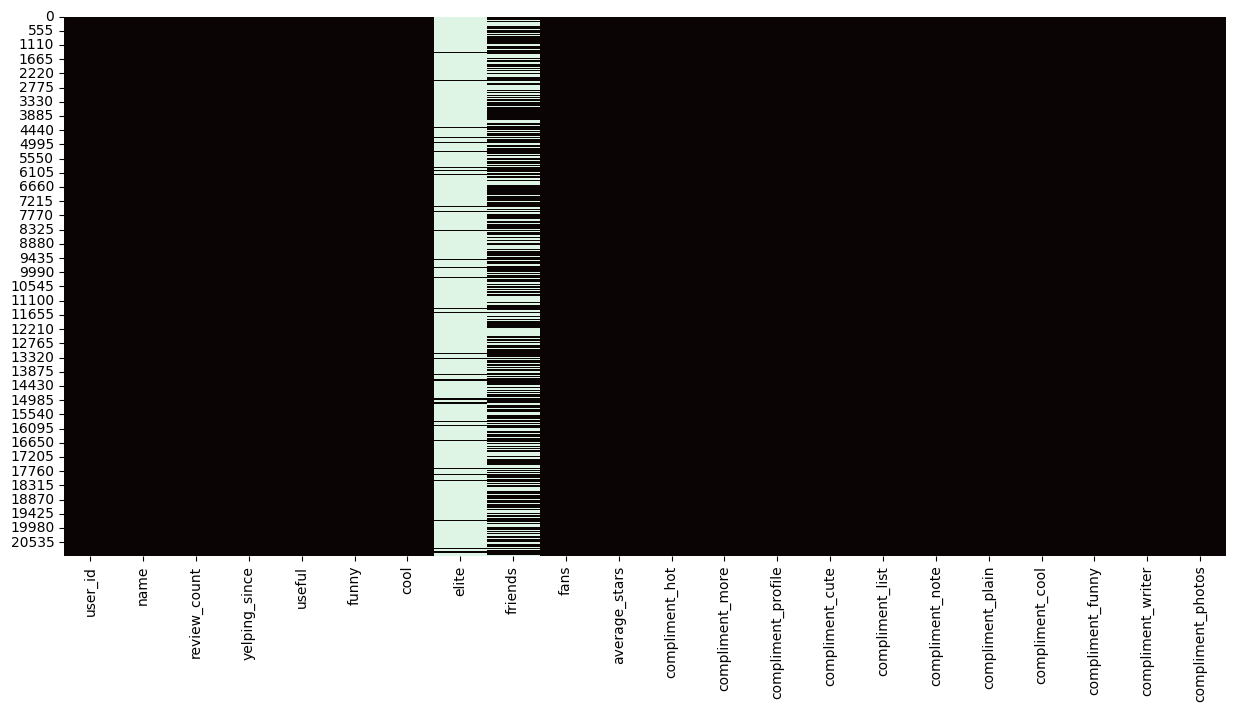

In [27]:
# Visualizemos 
plt.figure(figsize=(15,7))
sns.heatmap(sample_user.isnull(), cbar=False, cmap='mako')
plt.show()

In [6]:
sample_user.isna().sum(axis = 0).idxmax()

'elite'

In [7]:
#veamos algunas filas donde elite es null

sample_user[sample_user.elite.isna()].sample(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
12787,foq1bQGgPoRt0HLGGqFGZw,Jennifer,1,2012-08-25 04:44:54,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
13599,U7sqQCQFXRsD3ms_Wljvqw,Jonathan,3,2012-01-18 17:38:01,3,0,0,NaN,"s39mF2ZOL-j4bffxRRF-KQ, Z1ts2_hq5okTBrgefo3JOw...",0,...,0,0,0,0,1,0,0,0,0,0
12776,wPbf7BMtqWKjbxfgxHv6Ww,M,6,2012-08-09 19:02:25,1,1,2,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
12792,HizIWSdY988woJzGT7-Z3A,Nicole,7,2012-11-16 13:08:52,8,0,3,NaN,"IIR5YVhiEK0ERXo3Eej9RQ, 9WQ7havvuX8vA4ZlSTK48g",0,...,0,0,0,0,0,1,0,0,0,0
6127,Tc54F0S0RazAbGEQAiJzWw,Jake,2,2014-06-08 22:48:55,0,0,0,NaN,"-9tNezRmySd6LpXfLCMYgQ, Be6_58d5rhzCydukeziZmw...",0,...,0,0,0,0,0,0,0,0,0,1
398,h1kr-hW_cbyFPaUUutu54A,Miguel,6,2014-02-23 21:00:49,8,5,3,NaN,"a49stUSGG4Oxm0smlOSBeg, dGomWDDQidJBVJ9yfFAxXA...",0,...,0,0,0,0,1,0,0,0,0,0
19036,9sE9Y90Bb3QBD4qTi9t_vw,Lindsay,12,2016-05-31 23:56:02,4,1,3,NaN,"E3hW_aF1JbXwBMpXTAXt0g, yw4qaxUriWN41eDA3Uo_AQ...",0,...,0,0,0,0,0,0,0,0,0,0
10268,k2-WmRfW0xc-RRuYhfsq5w,Jessica,1,2014-06-25 18:26:18,4,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
18364,47ivPAcmHWGeFVd3B8zcqA,Karen,1,2018-03-09 18:08:38,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
15637,jEjERHSrPFnE3NsbKhoG9g,Beth,4,2015-09-18 04:30:11,0,0,0,NaN,"KZ8YoW3FoRIiQwNiguF6FQ, diFY90Rt3JupD1utiGdTSQ...",0,...,0,0,0,0,0,0,0,0,0,0


Como se puede ver donde elite es null significa que no fue miembro elite ningun año, no es una fila que deba descartarse

In [8]:
#veamos algunas filas donde friends es null

sample_user[sample_user.friends.isna()].sample(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
11543,lPHkpJur01NHH5dnaCtT4g,che,1,2010-11-25 02:04:24,5,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
16898,_c0n-DqiRyR7bfyx-absPw,Chris,9,2014-09-07 03:20:03,2,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
20880,UwmCpowBrgLokbTsSLYFaw,Ted,6,2018-05-27 10:05:37,2,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
15556,tE_Gp-PnWlcB5N2KjgrlVg,Avery,1,2020-09-06 21:35:18,2,1,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
19843,A-qZLOapJ__TCA7misVW9A,Vera,6,2009-12-12 05:19:08,6,1,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4306,dxcl43I0c5x_Q2fJQ1QQeg,Wilson,17,2018-05-13 22:44:23,23,2,1,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
5025,-XmWrPRhog2BqmItRMCUsA,Cindy,2,2016-04-15 10:54:20,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
12227,R3IS54QAqt-otxTYp8SRMg,Marlena,1,2017-12-05 12:33:43,1,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
6832,xVJe-vO0-XsMWiToKA4ATA,Matt,2,2017-12-19 15:32:17,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1129,HENsrCcJI6Hl88OCqn7Nug,Richard,3,2012-02-03 21:03:08,1,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


Siatuacion similar que elite cuando es nan es que no tiene amigos

### 2.4. Análisis de variables Cuantitativas

#### Analizamos review_count

In [10]:
sample_user['review_count'].describe()

count    21056.000000
mean        28.477869
std        101.958428
min          0.000000
25%          2.000000
50%          6.000000
75%         19.000000
max       5800.000000
Name: review_count, dtype: float64

Como se observa el desvio estandard es muy alto, en relación con el promedio y el Q3: hay pocos usuarios que hicieron muchisimas review

<Axes: xlabel='review_count'>

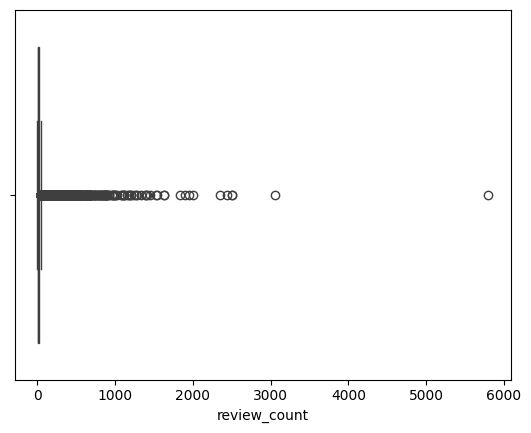

In [23]:
### Quitar outliers

sns.boxplot(data = sample_user, x = 'review_count')


Buscamos un valor adecuado para el limite superior

In [22]:
q3 = np.quantile(sample_user['review_count'].values, 0.75)
q1 = np.quantile(sample_user['review_count'].values, 0.25)
ric = q3 - q1
limite_superior = q3 + 1.5*ric
print (f"Límite superior: {limite_superior}")
print (f"Percentil del 90%: {sample_user['review_count'].quantile(0.9)}")

límite superior: 44.5
 Percentil del 90%: 57.0


Usamos el límite superior para graficar la distribución de frecuencia

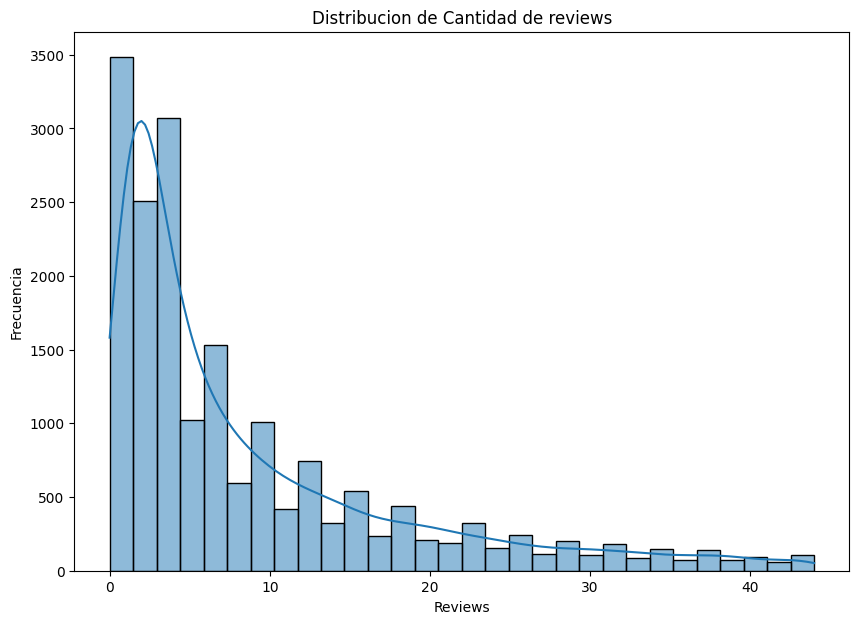

In [25]:
filtros = sample_user[sample_user['review_count']< limite_superior]
# Veamos su distribucion 
plt.figure(figsize=(10,7))
sns.histplot(filtros['review_count'], bins=30, kde=True)
plt.title('Distribucion de Cantidad de reviews')
plt.xlabel('Reviews')
plt.ylabel('Frecuencia')
plt.show()

Como se observa en la grafica,y se lee de las medidas de tencdencia central,  la mitad de los usuarios hacen menos de 6 reviews.

#### Analizamos average_starts

Histograma para "average_stars"

In [36]:
sample_user['average_stars'].describe()

count    21056.000000
mean         3.642582
std          1.166045
min          1.000000
25%          3.000000
50%          3.880000
75%          4.530000
max          5.000000
Name: average_stars, dtype: float64

<Axes: xlabel='average_stars'>

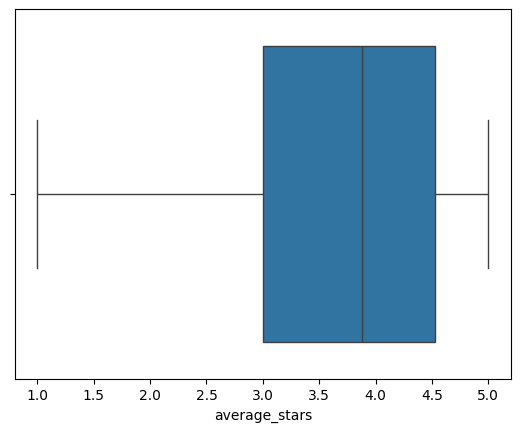

In [37]:
sns.boxplot(data = sample_user, x = 'average_stars')

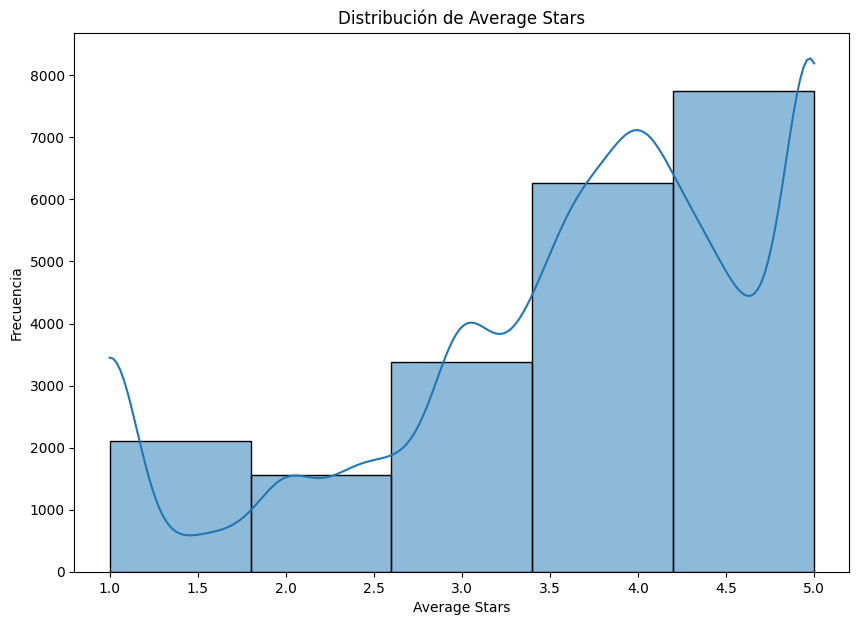

In [38]:

# Veamos su distribucion 
plt.figure(figsize=(10,7))
sns.histplot(sample_user['average_stars'], bins=5, kde=True)
plt.title('Distribución de Average Stars')
plt.xlabel('Average Stars')
plt.ylabel('Frecuencia')
plt.show()

Como se observa el valor mas frecuente son las 5 estrellas, tambien se ve que el 75% de los votos son de 3 o mas estrellas

### Estudiamos la correlación entre algunas variables numericas

Correlacion entre:
- reviews
- useful
- funny
- cool
- fans
- average_stars

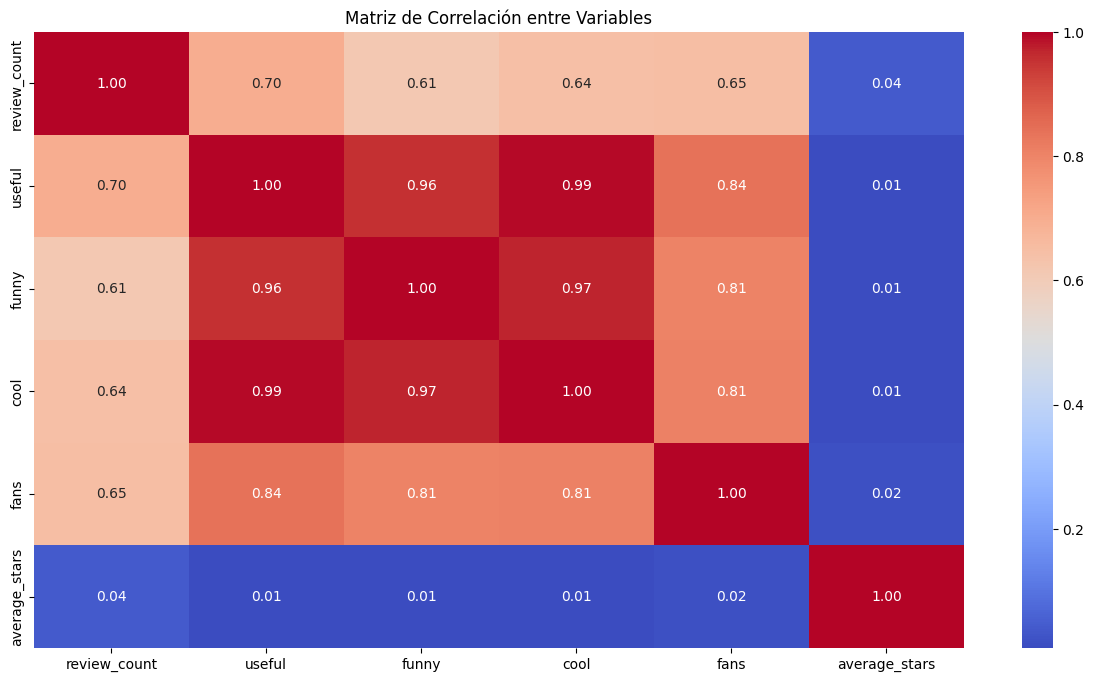

In [40]:
# Matriz de correlación
#variables numericas

corr_user = sample_user[['review_count','useful', 'funny','cool','fans', 'average_stars']].corr()
                          


# Visualizar la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(corr_user, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

Hay alta correlación entre useful, cool y funny, sumado al analisis de las estrellas, los usuarios por lo general votan positivamente. Es como que quieren resaltar cuando viven una buena experiencia.

**Pendientes**
- validar ids duplicados a lo largo de todo el dataset

## ETL Tips

In [41]:
# Leer el archivo JSON
df_tip = pd.read_json("../data/tip.json", lines=True)

# Normalizar datos JSON anidados
df_tip = pd.json_normalize(df_tip.to_dict(orient='records'))


df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Veamos la cantidad de filas columnas y los tipos

In [42]:
df_tip.shape

(908915, 5)

In [43]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


Visuaicenos nulos o faltantes

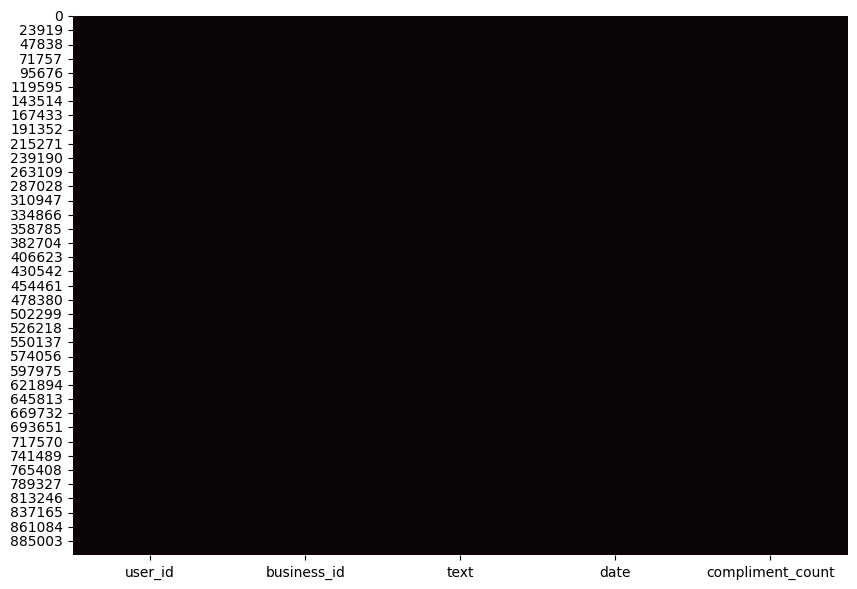

In [45]:
# Visualizemos 
plt.figure(figsize=(10,7))
sns.heatmap(df_tip.isnull(), cbar=False, cmap='mako')
plt.show()

Sin nulos o faltantes

Valores duplicados

In [46]:
df_tip.duplicated().sum() # Revisamos si hay valores duplicados.     

67

In [47]:
# eliminamos duplicados
df_tip.drop_duplicates(inplace=True)

Creamos una nube de palabras de los concejos (tips)

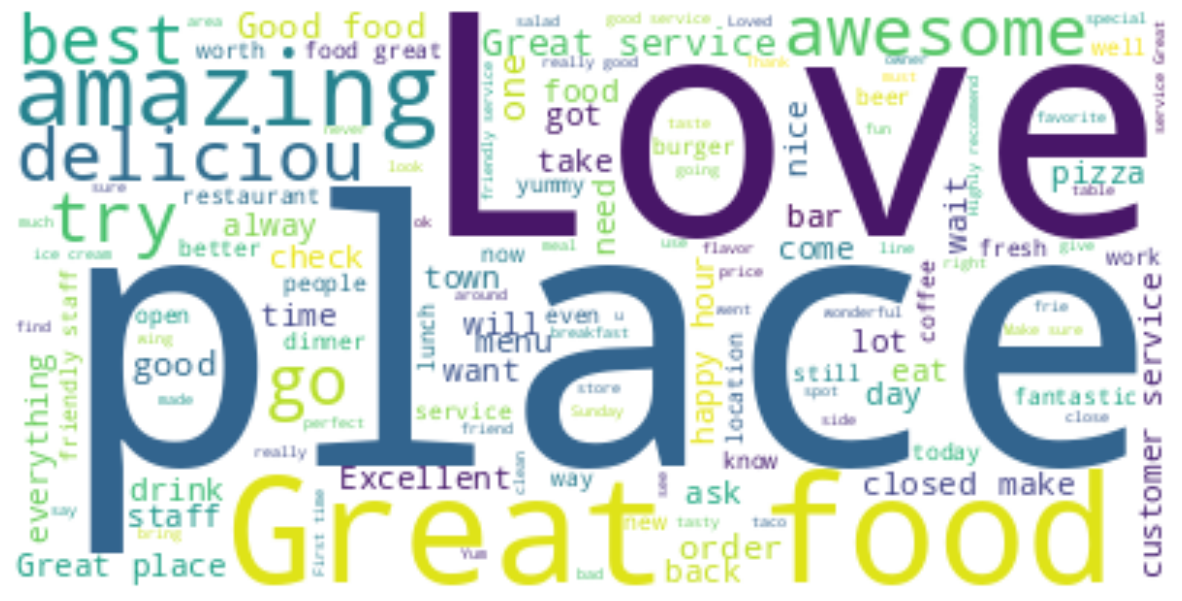

In [50]:
text = " ".join(i for i in df_tip['text'])

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()